In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
columns = ['Height', 'Weight', 'Gender', 'BMI',	'SkinColor', 'ClothesColor',	'PantsColor']

In [291]:
df = pd.read_csv('ProfileofBodyMetricsandFashionColors.csv',
                 names=columns,
                 sep=';',
                 header=0)
df.shape

(25000, 7)

In [292]:
df.head()

,Height,Weight,Gender,BMI,SkinColor,ClothesColor,PantsColor
0,167.089607,51.252494,Female,Underweight,"(226, 165, 137)","(19, 165, 16)","(24, 212, 123)"
1,181.648633,61.909547,Male,Ideal,"(204, 150, 103)","(55, 238, 252)","(101, 131, 136)"
2,176.272800,69.411778,Male,Ideal,"(226, 165, 137)","(58, 67, 207)","(27, 41, 168)"
3,173.270164,64.562199,Male,Ideal,"(119, 78, 58)","(29, 140, 46)","(71, 123, 25)"
4,172.181037,65.452010,Male,Ideal,"(226, 165, 137)","(200, 235, 99)","(122, 118, 117)"


In [293]:
df[['SkinColor_R', 'SkinColor_G', 'SkinColor_B']] = df['SkinColor'].str.extract(r'\((\d+),\s*(\d+),\s*(\d+)\)').astype(int)
df[['ClothesColor_R', 'ClothesColor_G', 'ClothesColor_B']] = df['ClothesColor'].str.extract(r'\((\d+),\s*(\d+),\s*(\d+)\)').astype(int)
df[['PantsColor_R', 'PantsColor_G', 'PantsColor_B']] = df['PantsColor'].str.extract(r'\((\d+),\s*(\d+),\s*(\d+)\)').astype(int)

df = df.drop(columns=['SkinColor'])
df = df.drop(columns=['ClothesColor'])
df = df.drop(columns=['PantsColor'])

print(df)

           Height     Weight  Gender          BMI  SkinColor_R  SkinColor_G  \
0      167.089607  51.252494  Female  Underweight          226          165   
1      181.648633  61.909547    Male        Ideal          204          150   
2      176.272800  69.411778    Male        Ideal          226          165   
3      173.270164  64.562199    Male        Ideal          119           78   
4      172.181037  65.452010    Male        Ideal          226          165   
...           ...        ...     ...          ...          ...          ...   
24995  176.535461  53.538008  Female  Underweight          226          165   
24996  163.952580  54.518674  Female        Ideal          119           78   
24997  164.334317  53.644285  Female        Ideal          246          215   
24998  171.524117  59.995797    Male        Ideal          246          215   
24999  174.949129  56.641938  Female        Ideal          246          215   

       SkinColor_B  ClothesColor_R  ClothesColor_G 

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height          25000 non-null  float64
 1   Weight          25000 non-null  float64
 2   Gender          25000 non-null  object 
 3   BMI             25000 non-null  object 
 4   SkinColor_R     25000 non-null  int64  
 5   SkinColor_G     25000 non-null  int64  
 6   SkinColor_B     25000 non-null  int64  
 7   ClothesColor_R  25000 non-null  int64  
 8   ClothesColor_G  25000 non-null  int64  
 9   ClothesColor_B  25000 non-null  int64  
 10  PantsColor_R    25000 non-null  int64  
 11  PantsColor_G    25000 non-null  int64  
 12  PantsColor_B    25000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 2.5+ MB


In [295]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,25000.0,172.702509,4.830264,153.107034,169.429170,172.709078,175.953312,190.888112
Weight,25000.0,57.642209,5.289290,35.386871,54.117461,57.677738,61.186318,77.529759
SkinColor_R,25000.0,212.282400,49.305862,119.000000,204.000000,235.000000,246.000000,253.000000
SkinColor_G,25000.0,165.962840,61.510282,41.000000,150.000000,185.000000,215.000000,220.000000
SkinColor_B,25000.0,144.773880,59.585213,44.000000,103.000000,152.000000,197.000000,213.000000
ClothesColor_R,25000.0,127.830200,74.156010,0.000000,63.000000,128.000000,192.000000,255.000000
ClothesColor_G,25000.0,128.081320,74.037914,0.000000,64.000000,128.000000,192.000000,255.000000
ClothesColor_B,25000.0,127.205880,73.980801,0.000000,63.000000,127.000000,191.000000,255.000000
PantsColor_R,25000.0,127.355840,73.842439,0.000000,63.750000,128.000000,191.000000,255.000000
PantsColor_G,25000.0,127.676360,74.095802,0.000000,63.000000,128.000000,192.000000,255.000000


In [296]:
df.isna().sum()

,0
Height,0
Weight,0
Gender,0
BMI,0
SkinColor_R,0
SkinColor_G,0
SkinColor_B,0
ClothesColor_R,0
ClothesColor_G,0
ClothesColor_B,0


In [297]:
from sklearn.preprocessing import LabelEncoder

In [298]:
X = df.drop('Gender', axis=1)
y = df['Gender']

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [301]:
# BMI 인코딩
bmi_encoder = LabelEncoder()
X_train['BMI'] = bmi_encoder.fit_transform(X_train['BMI'])
X_test['BMI'] = bmi_encoder.transform(X_test['BMI'])

In [302]:
# Gender 인코딩
gender_encoder = LabelEncoder()
y_train = gender_encoder.fit_transform(y_train)
y_test = gender_encoder.transform(y_test)

In [303]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 12), (5000, 12), (20000,), (5000,))

In [304]:
columns = X.columns
columns

Index(['Height', 'Weight', 'BMI', 'SkinColor_R', 'SkinColor_G', 'SkinColor_B',
       'ClothesColor_R', 'ClothesColor_G', 'ClothesColor_B', 'PantsColor_R',
       'PantsColor_G', 'PantsColor_B'],
      dtype='object')

In [305]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [306]:
from sklearn.preprocessing import StandardScaler

In [307]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [308]:
from sklearn.svm import SVC

In [309]:
clf = SVC(random_state=42)
clf.fit(X_train_s, y_train)

SVC(random_state=42)

In [310]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [311]:
y_pred = clf.predict(X_test_s)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [312]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [313]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred)
  pre = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  0.9634
recall:  0.9559
precision:  0.9581
f1:  0.957


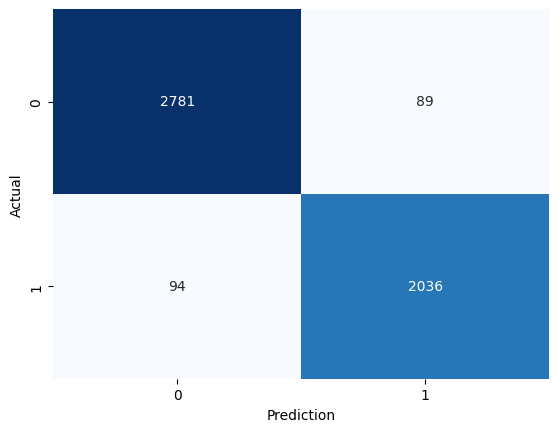

In [314]:
print_metrics(y_test, y_pred)

In [315]:
from sklearn.ensemble import RandomForestClassifier

In [316]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train_s, y_train)

RandomForestClassifier(random_state=42)

In [317]:
y_pred2 = clf2.predict(X_test_s)

acc:  0.9994
recall:  0.9986
precision:  1.0
f1:  0.9993


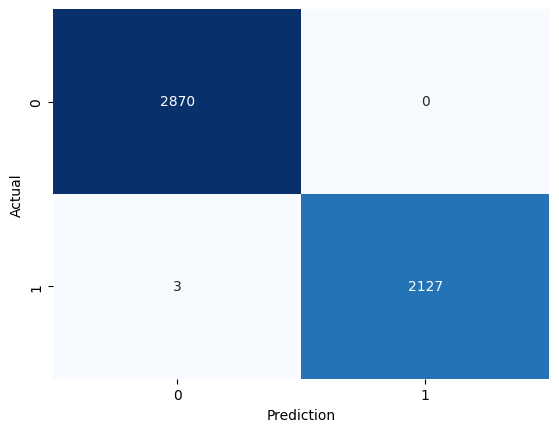

In [318]:
print_metrics(y_test, y_pred2)